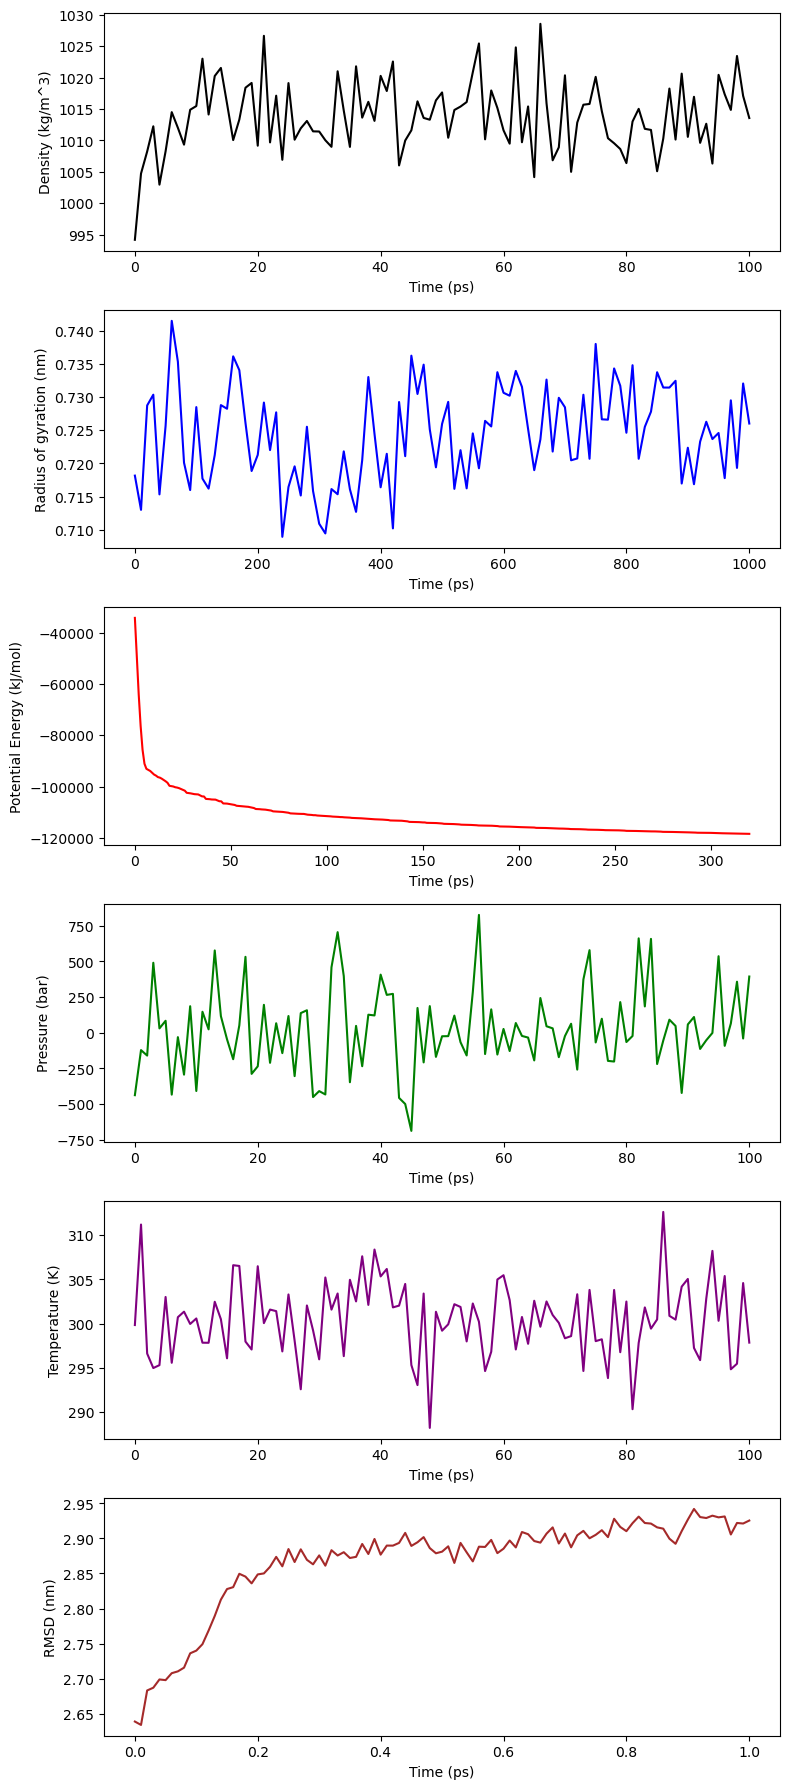

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt

# Reading and processing the file, skipping comment lines
file_pattern = '../Input/*.xvg'
xvg_files=glob.glob(file_pattern)

data_dict={}

for file_path in xvg_files:
    with open(file_path, 'r') as file:
        data_lines = [line for line in file if not line.startswith(('#', '@'))]

    data_array = np.array([line.split() for line in data_lines], dtype=float)
    
    if 'density' in file_path.lower():
        data_dict['density'] = {
            'time': data_array[:, 0],
            'density': data_array[:, 1]
        }
    elif 'gyrate' in file_path.lower():
        data_dict['gyrate'] = {
            'time': data_array[:, 0],
            'gyrate': data_array[:, 1]
        }
    elif 'potential' in file_path.lower():
        data_dict['potential'] = {
            'time': data_array[:, 0],
            'potential': data_array[:, 1]
        }
    elif 'pressure' in file_path.lower():
        data_dict['pressure'] = {
            'time': data_array[:, 0],
            'pressure': data_array[:, 1]
        }

    elif 'temperature' in file_path.lower():
        data_dict['temperature'] = {
            'time': data_array[:, 0],
            'temperature': data_array[:, 1]
        }
    elif 'rmsd' in file_path.lower():
        data_dict['rmsd'] = {
            'time': data_array[:, 0],
            'rmsd': data_array[:, 1]
        }


# Create 6 separate plots
fig, axes = plt.subplots(6, 1, figsize=(8, 18))

# if 'density' in data_dict:
axes[0].plot(data_dict['density']['time'], data_dict['density']['density'], c='black')
axes[0].set_ylabel('Density (kg/m^3)')

# if 'gyrate' in data_dict:
axes[1].plot(data_dict['gyrate']['time'], data_dict['gyrate']['gyrate'], c='blue')
axes[1].set_ylabel('Radius of gyration (nm)')
    
# if 'potential' in data_dict:
axes[2].plot(data_dict['potential']['time'], data_dict['potential']['potential'], c='red')
axes[2].set_ylabel('Potential Energy (kJ/mol)')

# if 'pressure' in data_dict:
axes[3].plot(data_dict['pressure']['time'], data_dict['pressure']['pressure'], c='green')
axes[3].set_ylabel('Pressure (bar)')

# if 'temperature' in data_dict:
axes[4].plot(data_dict['temperature']['time'], data_dict['temperature']['temperature'], c='purple')
axes[4].set_ylabel('Temperature (K)')

# if 'rmsd' in data_dict:
axes[5].plot(data_dict['rmsd']['time'], data_dict['rmsd']['rmsd'], c='brown')
axes[5].set_ylabel('RMSD (nm)')

for ax in axes.flat:
    ax.set(xlabel='Time (ps)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
plt.tight_layout()

# Display the plot
plt.show()